In [1]:
import glob
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from scipy.stats import kendalltau
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path_list = sorted(glob.glob('./result/*.csv'), reverse=True)
df_dict = {path.split('/')[-1][:-4]:pd.read_csv(path) for path in path_list}

In [4]:
result = {
    'MODEL':[], 
    'RMSE':[],
    'MAE(mean)':[],
    'MAE(median)':[]
}

for path, df in df_dict.items():
    rmse = mean_squared_error(df.true, df.pred, squared=False)
    mae_mean = mean_absolute_error(df.true, df.pred)
    mae_median = median_absolute_error(df.true, df.pred)
    
    for key, item in zip(result, ([path, rmse, mae_mean, mae_median])):
        result[key].append(item) 
        
result = pd.DataFrame(result)

In [5]:
result['KIND'] = result.MODEL.apply(lambda x:'null' if x.count('linearSVR') else x.split('_')[1])
result['LOSS'] = result.MODEL.apply(lambda x:'L1loss' if x.count('L1loss') else 'L2loss')
result['MODEL'] = result.MODEL.apply(lambda x:x.split('_')[0])
#result['TYPE'] = result.MODEL.apply(lambda x: 'Linear' if x=='linearSVR' else 'DNN')
result = result[result.KIND != 'nochid']

In [6]:
replace_dcit = {
    'random':'Random', 
    'node2vec':'Node2Vec-SingleGraph', 
    'gcn':'GCN-SingleGraph', 
    'dynamicNode2vec':'Node2Vec-DynamicGraph', 
    'dynamicGCN':'GCN+RNN-DynamicGraph',
    'null': 'NULL'
}

result.KIND = result.KIND.map(replace_dcit)
result

,MODEL,RMSE,MAE(mean),MAE(median),KIND,LOSS
0,mlp,402233.316309,56237.114256,10237.015403,Random,L1loss
1,mlp,400840.075486,58195.864508,11451.651071,Random,L2loss
2,mlp,402727.227958,56056.804472,10083.771564,Node2Vec-SingleGraph,L1loss
3,mlp,402296.711858,58431.298189,11422.920628,Node2Vec-SingleGraph,L2loss
6,mlp,403912.312767,56030.162701,10060.322518,GCN-SingleGraph,L1loss
7,mlp,402346.602801,57918.576837,11074.299758,GCN-SingleGraph,L2loss
8,mlp,419651.590706,69637.355000,15075.965548,Node2Vec-DynamicGraph,L2loss
9,mlp,389490.288060,61930.915256,11111.365330,GCN+RNN-DynamicGraph,L2loss
10,linearSVR,403545.303792,61324.891771,11865.249455,NULL,L1loss
11,linearSVR,418803.891470,65563.802068,10870.423595,NULL,L2loss


In [7]:
#result.to_csv('result/result.csv', index=False, encoding='utf-8')

In [8]:
sort_dict = {
    'MODEL': ['mlp', 'etRNN', 'linearSVR'],
    'KIND': list(replace_dcit.values())+[np.nan]
}

result = result.sort_values(by=['MODEL','KIND'], ignore_index=True, 
                            key=lambda x: x.apply(lambda x: sort_dict['MODEL'].index(x)) if x.name=='MODEL' else 
                            x.apply(lambda x: sort_dict['KIND'].index(x)))
result

,MODEL,RMSE,MAE(mean),MAE(median),KIND,LOSS
0,mlp,402233.316309,56237.114256,10237.015403,Random,L1loss
1,mlp,400840.075486,58195.864508,11451.651071,Random,L2loss
2,mlp,402727.227958,56056.804472,10083.771564,Node2Vec-SingleGraph,L1loss
3,mlp,402296.711858,58431.298189,11422.920628,Node2Vec-SingleGraph,L2loss
4,mlp,403912.312767,56030.162701,10060.322518,GCN-SingleGraph,L1loss
5,mlp,402346.602801,57918.576837,11074.299758,GCN-SingleGraph,L2loss
6,mlp,419651.590706,69637.355000,15075.965548,Node2Vec-DynamicGraph,L2loss
7,mlp,389490.288060,61930.915256,11111.365330,GCN+RNN-DynamicGraph,L2loss
8,etRNN,408574.134968,55994.134545,9954.595700,Random,L1loss
9,etRNN,401164.693943,60374.614027,12567.802000,Random,L2loss


In [9]:
#result = result.append({
#    'MODEL':'preMonth', 
#    'RMSE':446185.73,
#    'MAE(mean)':74187.19,
#    'MAE(median)':13138.50,
#    'KIND':'null',
#    'LOSS':'null'},
#    ignore_index=True)W

<Figure size 864x576 with 0 Axes>

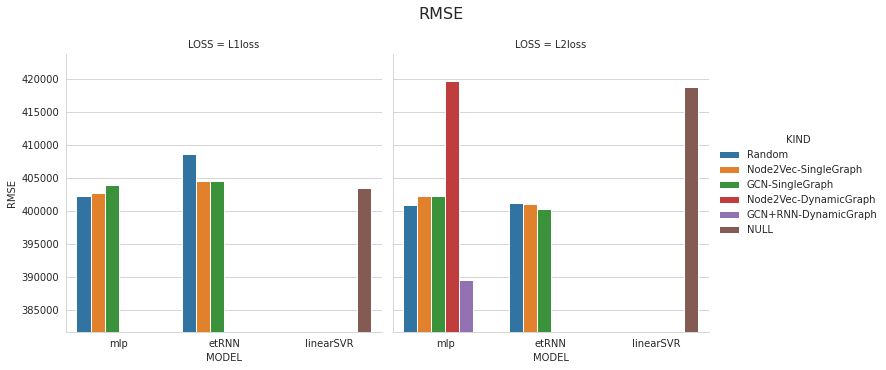

<Figure size 864x576 with 0 Axes>

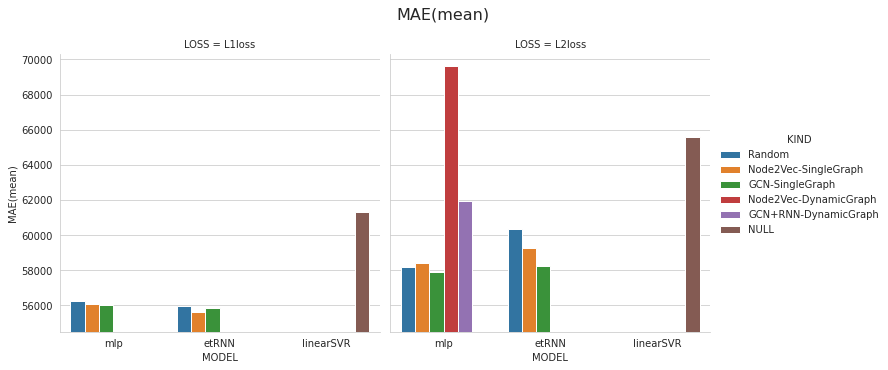

<Figure size 864x576 with 0 Axes>

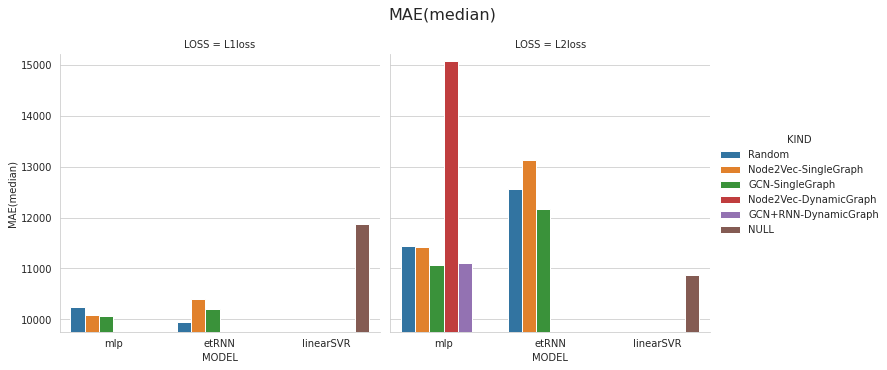

In [27]:
for k in list(result.columns)[1:4]:
    with sns.axes_style("whitegrid"):
        plt.figure(figsize = (12, 8))
        
        g = sns.catplot(x='MODEL', y=k, hue='KIND', col='LOSS', data=result, kind='bar');   
        g.set(ylim=(int(result[k].min()*0.98), int(result[k].max()*1.01)))
        
        g.fig.subplots_adjust(top=0.85)
        g.fig.suptitle(k, fontsize=16)
        plt.savefig('picture0127/{}.png'.format(k), dpi=200, bbox_inches='tight')
        plt.show()

In [11]:
def cal_score_v2(chid, true_pos, true_neg, pred_pos, pred_neg):
    tp = (chid.isin(true_pos) & chid.isin(pred_pos)).sum()
    fp = (chid.isin(true_neg) & chid.isin(pred_pos)).sum()
    fn = (chid.isin(true_pos) & chid.isin(pred_neg)).sum()
    tn = (chid.isin(true_neg) & chid.isin(pred_neg)).sum()
    
    precision = tp / (tp+fp)
    recall = tp / (tp+fn)    

    return precision, recall, tp, tn, fp, fn

In [12]:
model_list = list(df_dict.keys())
index_list = [list(range(0, df.shape[0], 2)), list(range(1, df.shape[0], 2))]

In [13]:
k_list = [500, 2500, 5000, 10000]
result_list = []

for i, index in enumerate(index_list):
    for model in tqdm(model_list[:]):
        
        df = df_dict[model].loc[index, :].copy()
        
        for k in k_list: 
            
            df_dsc_true = df.sort_values(by=['true'], ascending=False, ignore_index=True)
            df_dsc_pred = df.sort_values(by=['pred'], ascending=False, ignore_index=True)
            
            top_true_pos = list(df_dsc_true.chid.values[:k])
            top_true_neg = list(df_dsc_true.chid.values[k:])
            top_pred_pos = list(df_dsc_pred.chid.values[:k])
            top_pred_neg = list(df_dsc_pred.chid.values[k:])    

            top_precision, top_recall, tp, tn, fp, fn = cal_score_v2(df.chid, top_true_pos, top_true_neg, 
                                                                 top_pred_pos, top_pred_neg)
            if np.sum([tp, tn, fp, fn]) != 50000:
                print(model, 1)
            top_tau, p_value = kendalltau(top_true_pos, top_pred_pos)
            
            df_asc_true = df.sort_values(by=['true'], ascending=True, ignore_index=True)
            df_asc_pred = df.sort_values(by=['pred'], ascending=True, ignore_index=True)
            
            bottom_true_pos = list(df_asc_true.chid.values[:k])
            bottom_true_neg = list(df_asc_true.chid.values[k:])
            bottom_pred_pos = list(df_asc_pred.chid.values[:k])
            bottom_pred_neg = list(df_asc_pred.chid.values[k:])    

            bottom_precision, bottom_recall, tp, tn, fp, fn = cal_score_v2(df.chid, bottom_true_pos, bottom_true_neg, 
                                                                       bottom_pred_pos, bottom_pred_neg)
            if np.sum([tp, tn, fp, fn]) != 50000:
                print(model, 2)
            bottom_tau, p_value = kendalltau(bottom_true_pos, bottom_pred_pos)

            result_list.append([model, i+11, k, top_precision, top_recall, top_tau, bottom_precision, bottom_recall, bottom_tau])

In [37]:
for model, df in df_dict.items():
    print(model, '\t', 
          np.sort(df.groupby(by='chid').mean().true.values)[-500], 
          np.sort(df.groupby(by='chid').mean().true.values)[-2500], 
          np.sort(df.groupby(by='chid').mean().true.values)[-5000],  
          np.sort(df.groupby(by='chid').mean().true.values)[-10000])    

mlp_random_L1loss 	 712364.4129480895 265717.0223307737 162470.5319751674 88466.98045380303
mlp_random 	 712364.4129480895 265717.0223307737 162470.5319751674 88466.98045380303
mlp_node2vec_L1loss 	 712364.4129480895 265717.0223307737 162470.5319751674 88466.98045380303
mlp_node2vec 	 712364.4129480895 265717.0223307737 162470.5319751674 88466.98045380303
mlp_nochid_L1loss 	 712364.4129480895 265717.0223307737 162470.5319751674 88466.98045380303
mlp_nochid 	 712364.4129480895 265717.0223307737 162470.5319751674 88466.98045380303
mlp_gcn_L1loss 	 712364.4129480895 265717.0223307737 162470.5319751674 88466.98045380303
mlp_gcn 	 712364.4129480895 265717.0223307737 162470.5319751674 88466.98045380303
mlp_dynamicNode2vec 	 712364.2489098243 265717.51551530394 162470.47206198046 88466.96578270433
mlp_dynamicGCN 	 712364.2489098243 265717.51551530394 162470.47206198046 88466.96578270433
linearSVR_L1loss 	 712364.4999999999 265717.0000000002 162470.50000000006 88466.99999999997
linearSVR 	 712

In [42]:
df = df_dict['mlp_random_L1loss']

print(round(np.sort(df.groupby(by='chid').mean().true.values)[-500]), 
      round(np.sort(df.groupby(by='chid').mean().true.values)[-2500]), 
      round(np.sort(df.groupby(by='chid').mean().true.values)[-5000]),  
      round(np.sort(df.groupby(by='chid').mean().true.values)[-10000]))

print(round(np.sort(df.groupby(by='chid').mean().true.values)[500]), 
      round(np.sort(df.groupby(by='chid').mean().true.values)[2500]), 
      round(np.sort(df.groupby(by='chid').mean().true.values)[5000]),  
      round(np.sort(df.groupby(by='chid').mean().true.values)[10000]))

712364.0 265717.0 162471.0 88467.0
0.0 0.0 0.0 2223.0


In [15]:
df_rank = pd.DataFrame(data=result_list, 
                       columns=['MODEL', 'MONTH', 'K', 'top_precision', 'top_recall', 'top_kendalltau', 
                                'bottom_precision', 'bottom_recall', 'bottom_kendalltau'])
df_rank.head(2)

,MODEL,MONTH,K,top_precision,top_recall,top_kendalltau,bottom_precision,bottom_recall,bottom_kendalltau
0,mlp_random_L1loss,11,500,0.2620,0.2620,-0.013531,0.0000,0.0000,-0.056433
1,mlp_random_L1loss,11,2500,0.3748,0.3748,0.005307,0.1876,0.1876,-0.007735


In [48]:
df_rank[(df_rank.K==10000) & (df_rank.MODEL=='etRNN') & (df_rank.LOSS=='L2loss')]

,MODEL,MONTH,K,top_precision,top_recall,top_kendalltau,bottom_precision,bottom_recall,bottom_kendalltau,KIND,LOSS
71,etRNN,11,10000,0.5342,0.5342,-0.006069,0.5765,0.5765,-0.001057,Random,L2loss
79,etRNN,12,10000,0.5232,0.5232,-0.006879,0.5652,0.5652,-0.017252,Random,L2loss
87,etRNN,11,10000,0.5482,0.5482,0.000276,0.5739,0.5739,-0.004140,Node2Vec-SingleGraph,L2loss
95,etRNN,12,10000,0.5278,0.5278,0.007947,0.5556,0.5556,-0.005260,Node2Vec-SingleGraph,L2loss
103,etRNN,11,10000,0.5611,0.5611,0.006568,0.5751,0.5751,0.005135,GCN-SingleGraph,L2loss
111,etRNN,12,10000,0.5461,0.5461,0.001208,0.5659,0.5659,-0.017720,GCN-SingleGraph,L2loss


In [16]:
df_rank['KIND'] = df_rank.MODEL.apply(lambda x:'null' if x.count('linearSVR') else x.split('_')[1])
df_rank['LOSS'] = df_rank.MODEL.apply(lambda x:'L1loss' if x.count('L1loss') else 'L2loss')
df_rank['MODEL'] = df_rank.MODEL.apply(lambda x:x.split('_')[0])
#df_rank['TYPE'] = df_rank.MODEL.apply(lambda x: 'Linear' if x=='linearSVR' else 'DNN')
df_rank.head(2)

,MODEL,MONTH,K,top_precision,top_recall,top_kendalltau,bottom_precision,bottom_recall,bottom_kendalltau,KIND,LOSS
0,mlp,11,500,0.2620,0.2620,-0.013531,0.0000,0.0000,-0.056433,random,L1loss
1,mlp,11,2500,0.3748,0.3748,0.005307,0.1876,0.1876,-0.007735,random,L1loss


In [17]:
df_rank = df_rank[df_rank.KIND != 'nochid']
df_rank.KIND = df_rank.KIND.map(replace_dcit)
df_rank = df_rank.sort_values(by=['MODEL','KIND'], ignore_index=True, 
                              key=lambda x: x.apply(lambda x: sort_dict['MODEL'].index(x)) if x.name=='MODEL' else 
                              x.apply(lambda x: sort_dict['KIND'].index(x)))
df_rank

,MODEL,MONTH,K,top_precision,top_recall,top_kendalltau,bottom_precision,bottom_recall,bottom_kendalltau,KIND,LOSS
0,mlp,11,500,0.2620,0.2620,-0.013531,0.0000,0.0000,-0.056433,Random,L1loss
1,mlp,11,2500,0.3748,0.3748,0.005307,0.1876,0.1876,-0.007735,Random,L1loss
2,mlp,11,5000,0.4538,0.4538,-0.005869,0.3998,0.3998,-0.013673,Random,L1loss
3,mlp,11,10000,0.5641,0.5641,-0.000496,0.5831,0.5831,-0.019570,Random,L1loss
4,mlp,11,500,0.2640,0.2640,0.003784,0.0440,0.0440,-0.012649,Random,L2loss
...,...,...,...,...,...,...,...,...,...,...,...
123,linearSVR,12,10000,0.5335,0.5335,0.001543,0.5732,0.5732,-0.013151,NULL,L1loss
124,linearSVR,12,500,0.2040,0.2040,0.016064,0.0360,0.0360,0.037371,NULL,L2loss
125,linearSVR,12,2500,0.2908,0.2908,0.002129,0.1648,0.1648,0.007521,NULL,L2loss
126,linearSVR,12,5000,0.3860,0.3860,-0.002065,0.3408,0.3408,0.007188,NULL,L2loss


<Figure size 864x576 with 0 Axes>

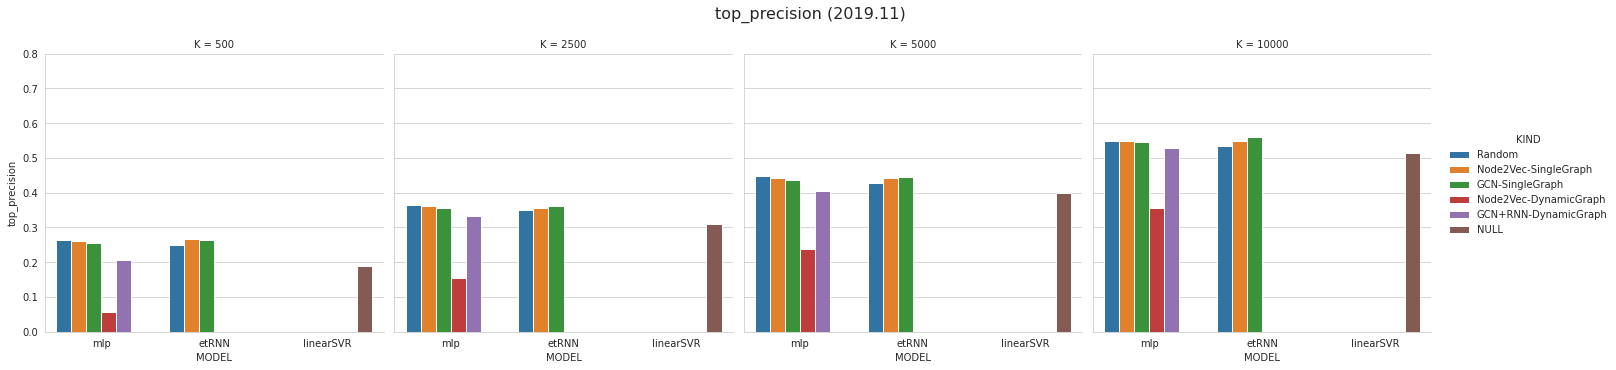

<Figure size 864x576 with 0 Axes>

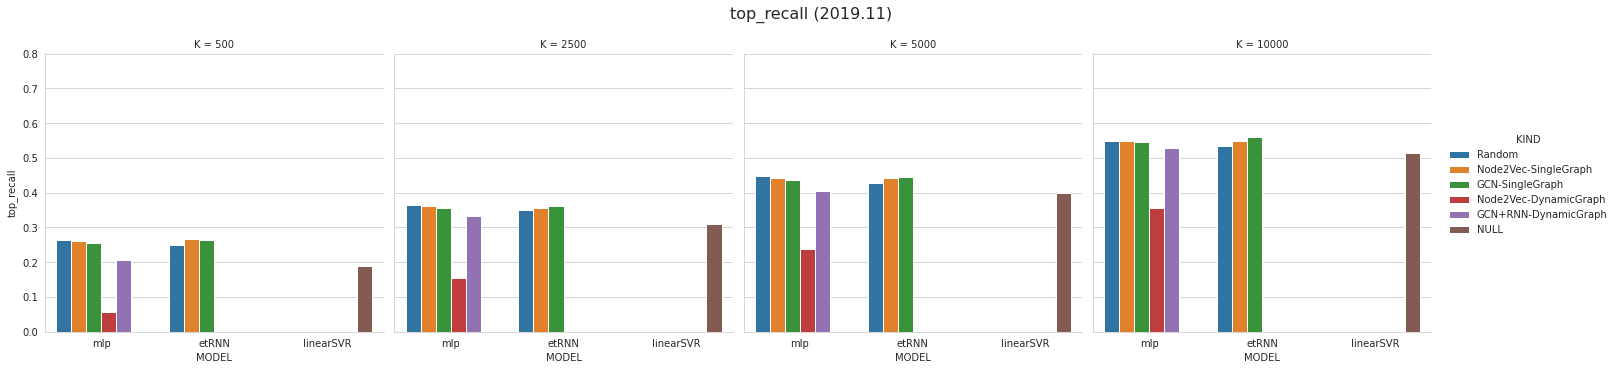

<Figure size 864x576 with 0 Axes>

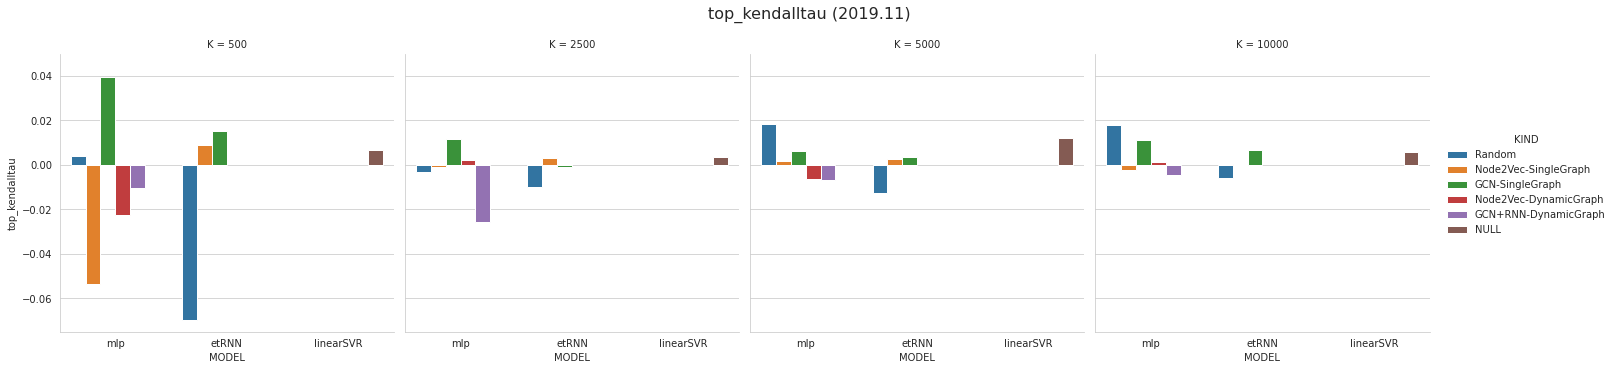

<Figure size 864x576 with 0 Axes>

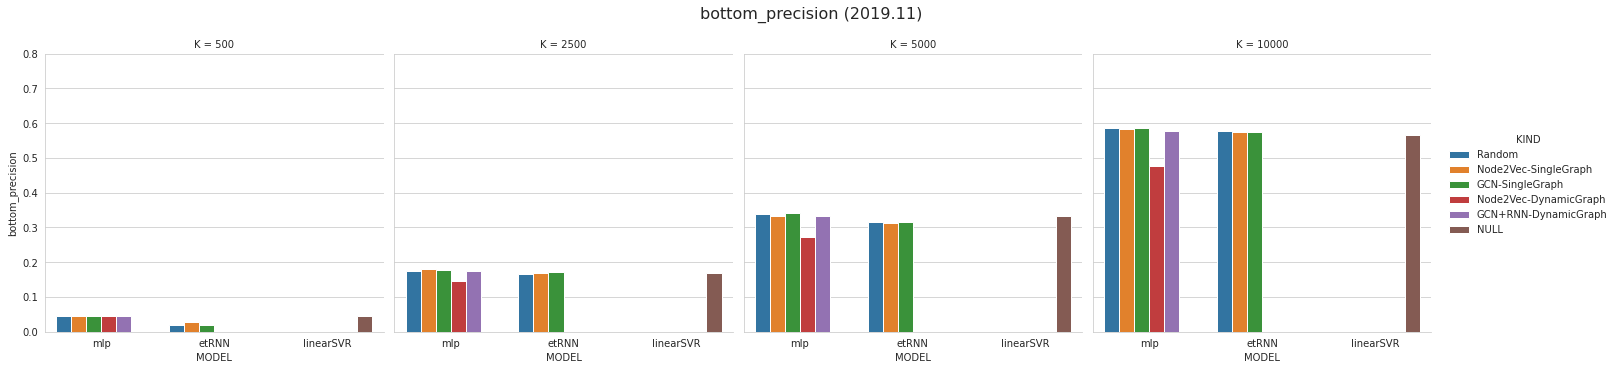

<Figure size 864x576 with 0 Axes>

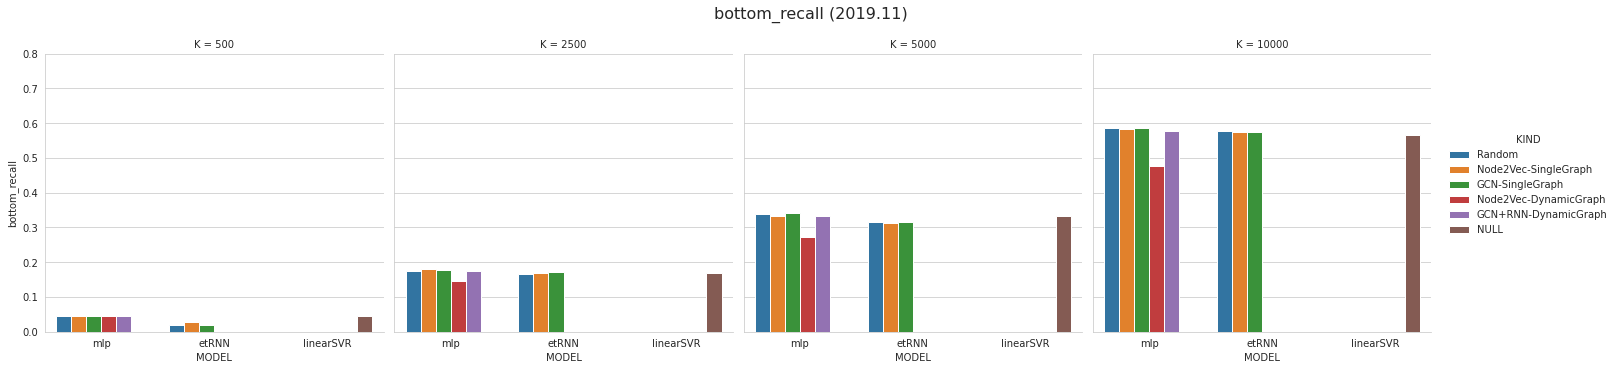

<Figure size 864x576 with 0 Axes>

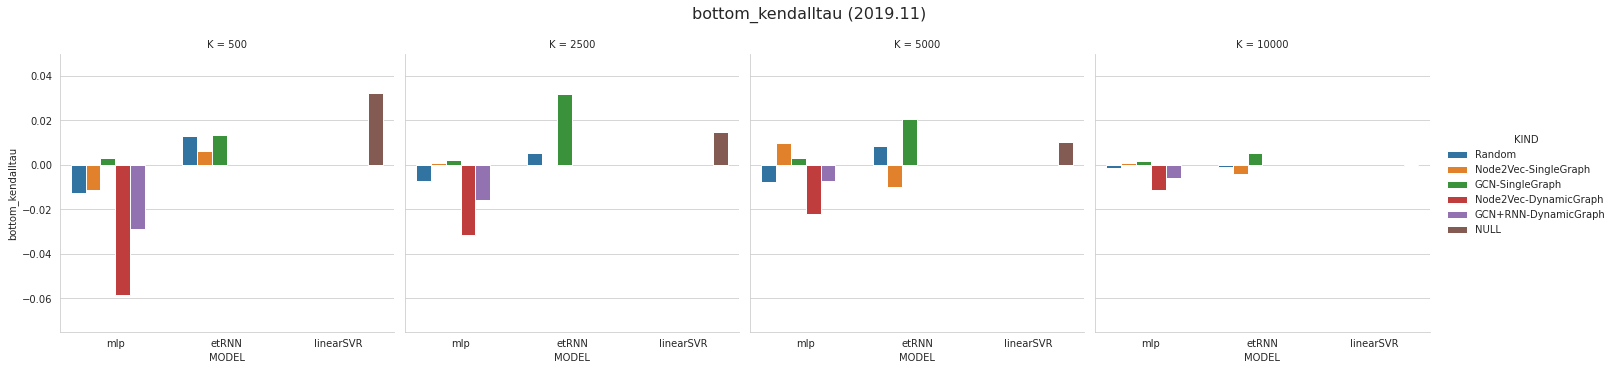

In [26]:
mask = ((df_rank.LOSS=='L2loss') & (df_rank.MONTH==11))

for k in list(df_rank.columns)[3:-2]:
    with sns.axes_style("whitegrid"):
        plt.figure(figsize = (12, 8))
        
        g = sns.catplot(x='MODEL', y=k, hue='KIND', col='K', data=df_rank[mask], kind='bar', errwidth=0);   
        if k.count('kendalltau'):
            g.set(ylim=(-.075, .05))
        else:
            g.set(ylim=(0, .8))
        
        g.fig.subplots_adjust(top=0.85)
        title = '{} (2019.{})'.format(k, 11)
        g.fig.suptitle(title, fontsize=16)
        
        plt.savefig('picture0127/{}.png'.format(title), dpi=200, bbox_inches='tight')
        plt.show()

<Figure size 864x576 with 0 Axes>

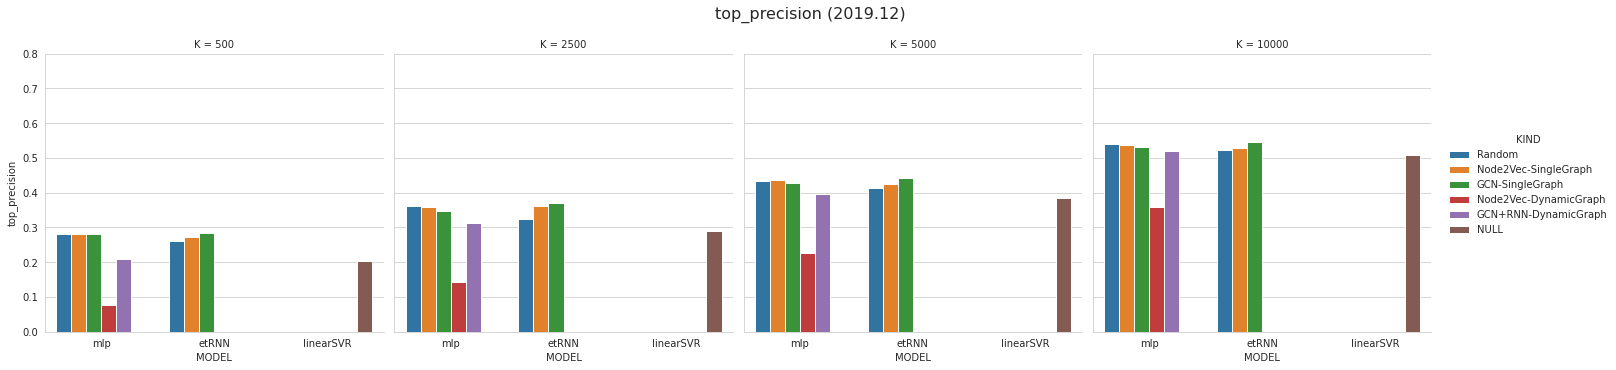

<Figure size 864x576 with 0 Axes>

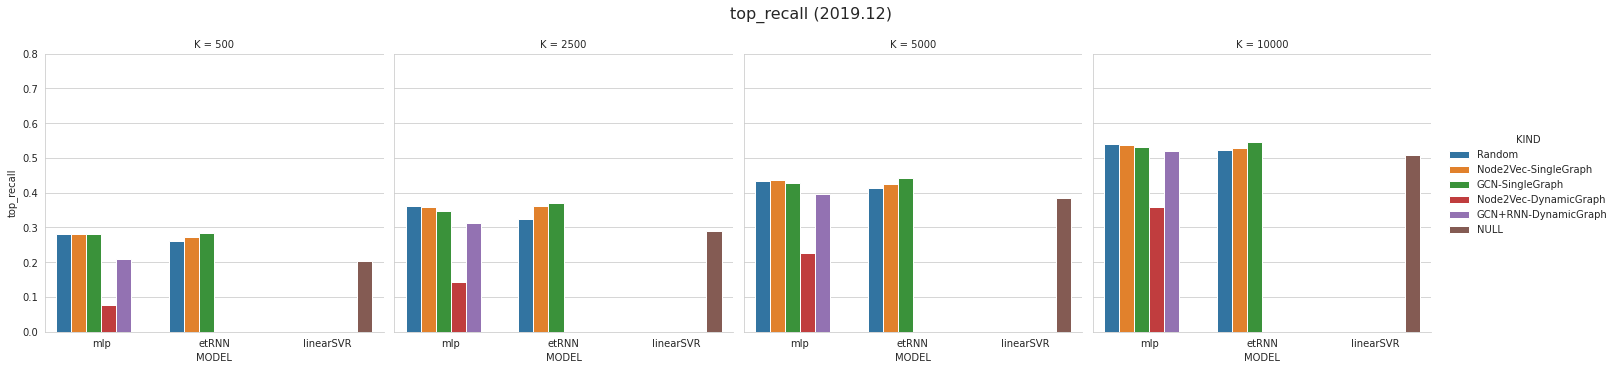

<Figure size 864x576 with 0 Axes>

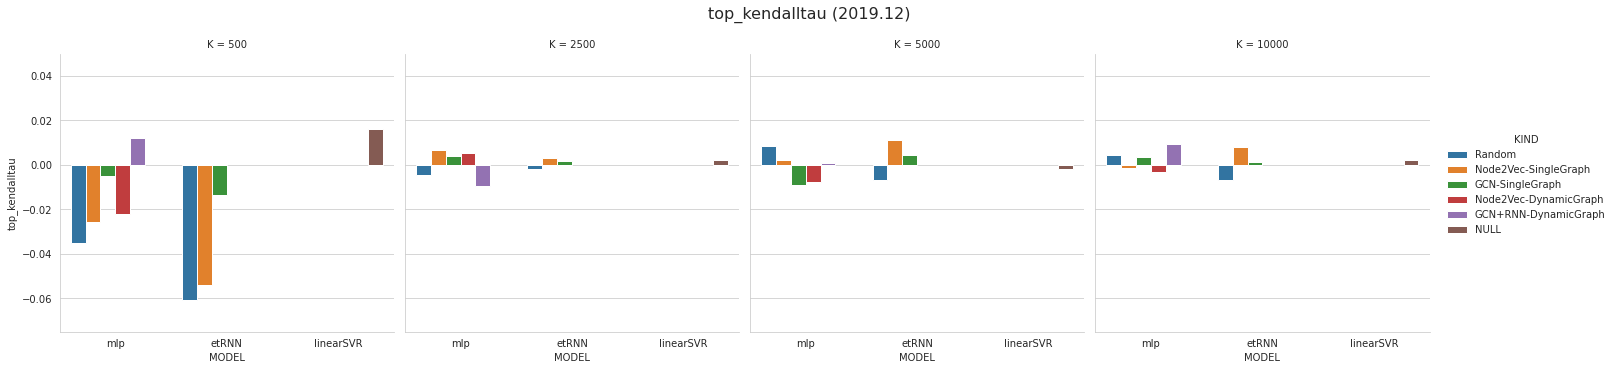

<Figure size 864x576 with 0 Axes>

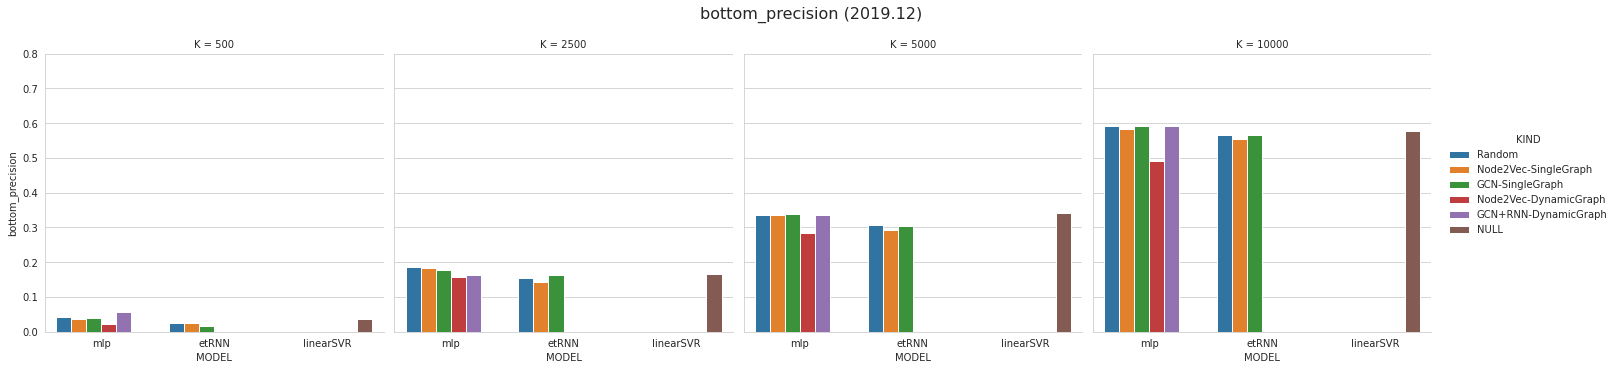

<Figure size 864x576 with 0 Axes>

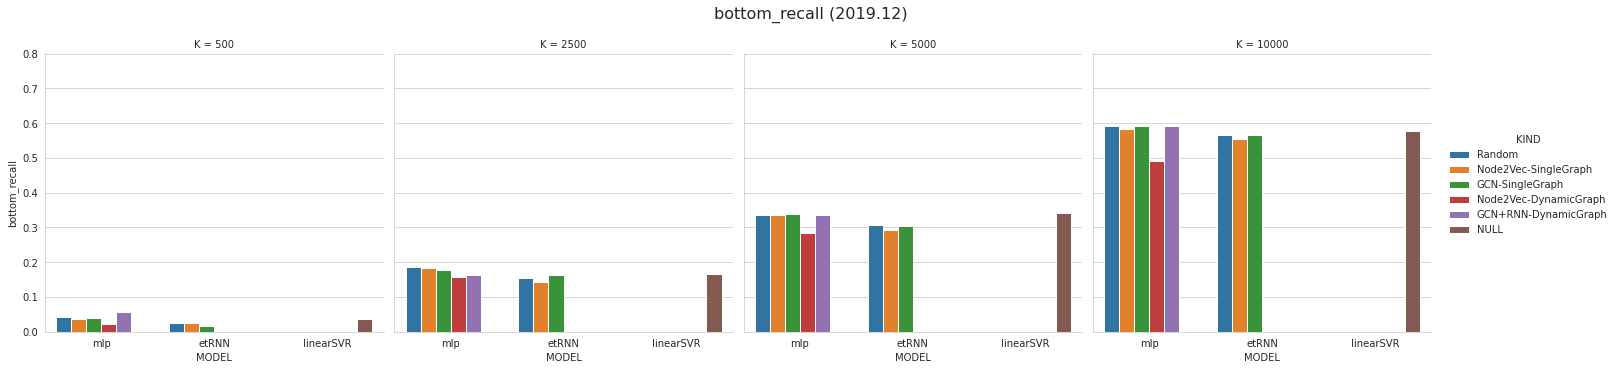

<Figure size 864x576 with 0 Axes>

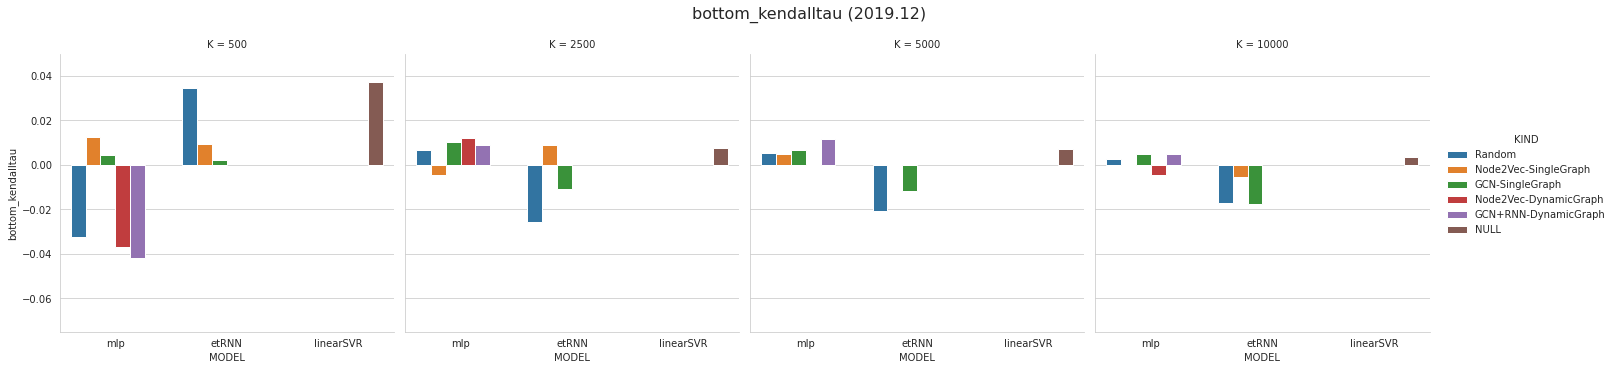

In [25]:
mask = ((df_rank.LOSS=='L2loss') & (df_rank.MONTH==12))

for k in list(df_rank.columns)[3:-2]:
    with sns.axes_style("whitegrid"):
        plt.figure(figsize = (12, 8))
        
        g = sns.catplot(x='MODEL', y=k, hue='KIND', col='K', data=df_rank[mask], kind='bar', errwidth=0);   
        if k.count('kendalltau'):
            g.set(ylim=(-.075, .05))
        else:
            g.set(ylim=(0, .8))
        
        g.fig.subplots_adjust(top=0.85)
        title = '{} (2019.{})'.format(k, 12)
        g.fig.suptitle(title, fontsize=16)
        
        plt.savefig('picture0127/{}.png'.format(title), dpi=200, bbox_inches='tight')
        plt.show()

In [20]:
#df_rank.to_csv('result/rank.csv', index=False, encoding='utf-8')